In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import optimize
import math
from scipy import special


In [2]:
e=1.602*10**-19
h= 6.62607004*10**-34
pi= math.pi
r=e**2/(pi**2*h)
t=70*10**-9
w=10*10**-6
L=20*10**-6
r

3.924363754302094e-06

In [3]:
df = pd.read_csv('RT.csv')
df

,Unnamed: 0,Temperature,Resistance
0,0,10.00105,17.831705
1,1,15.64500,18.950647
2,2,20.68480,19.941018
3,3,25.76500,20.878664
4,4,30.77995,21.745524
5,5,35.63250,22.551866
6,6,40.70890,23.373204
7,7,45.78590,24.154091
8,8,50.77555,24.882966
9,9,55.80185,25.601458


In [4]:
df=df.drop(labels =['Unnamed: 0'],axis = 1)

In [5]:
df['Conductance(1/Ohm)']=np.reciprocal(df['Resistance'])
df['Resistivity (Ohm-m)']=df['Resistance']*(w*t/L)
df['Conductivity (1/Ohm-m)']=np.reciprocal(df['Resistivity (Ohm-m)'])
df
#df['Conductance(1/Ohm)']=df['Conductance(1/Ohm)']-df['Conductance(1/Ohm)'][0]

,Temperature,Resistance,Conductance(1/Ohm),Resistivity (Ohm-m),Conductivity (1/Ohm-m)
0,10.00105,17.831705,0.056080,6.241097e-07,1.602282e+06
1,15.64500,18.950647,0.052769,6.632727e-07,1.507676e+06
2,20.68480,19.941018,0.050148,6.979356e-07,1.432797e+06
3,25.76500,20.878664,0.047896,7.307533e-07,1.368451e+06
4,30.77995,21.745524,0.045986,7.610933e-07,1.313899e+06
5,35.63250,22.551866,0.044342,7.893153e-07,1.266921e+06
6,40.70890,23.373204,0.042784,8.180621e-07,1.222401e+06
7,45.78590,24.154091,0.041401,8.453932e-07,1.182882e+06
8,50.77555,24.882966,0.040188,8.709038e-07,1.148232e+06
9,55.80185,25.601458,0.039060,8.960510e-07,1.116008e+06


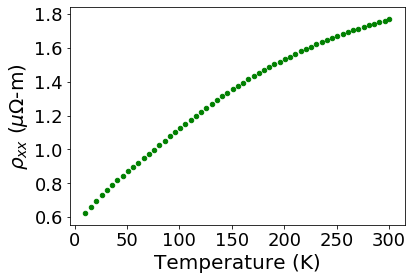

In [19]:
#x=np.array(df['Temperature'])
#y=np.array(df['Resistance'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\\rho _{xx}$ ($\mu$$\u03A9$-m)' ,fontsize=20)
plt.scatter(x,y3*10**6,s=20,color='green')
#plt.ylim([0.0000005,0.000002])
#plt.ticklabel_format(style='sci', axis='y', scilimits=(-3,-3), useMathText=True)


## All data

In [152]:
#df

<Figure size 8000x8000 with 0 Axes>

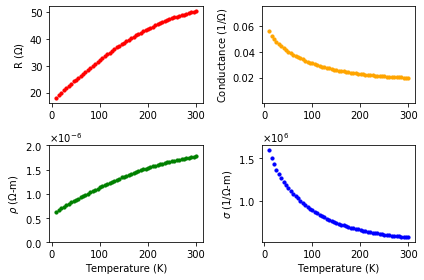

In [7]:
x=np.array(df['Temperature'])
y1=np.array(df['Resistance'])
y2=np.array(df['Conductance(1/Ohm)'])
y3=np.array(df['Resistivity (Ohm-m)'])
y4=np.array(df['Conductivity (1/Ohm-m)'])
plt.figure(figsize=(100, 100),dpi=80)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
#fig. suptitle('All data')
ax1.scatter(x,y1,s=10,color='red')
ax1.set(ylabel='R ($\u03A9$)')
#ax1.autoscale_view
ax2.scatter(x,y2,s=10,color='orange')
ax2.set(ylabel= 'Conductance (1/$\u03A9$)')
ax3.scatter(x,y3,s=10,color='green')
ax3.set(xlabel='Temperature (K)',ylabel ='$\\rho$ ($\u03A9$-m)')
ax3.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6), useMathText=True)
ax3.set_ylim([0,0.000002])
ax4.scatter(x,y4,s=10,color='blue')
ax4.set(xlabel='Temperature (K)',ylabel = '$\sigma$ (1/$\u03A9$-m)')
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fig.tight_layout()

## Resistivity_fitting   
### $\rho$ (T) = $\rho_{0}$ + AT$^{n}$
  
ref:Disordered electronic systems

In [70]:
x=np.array(df['Temperature'])
y=np.array(df['Resistivity (Ohm-m)'])
def resistivity(x,a,b,n):
    return a+b*x**n
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt, pcov = optimize.curve_fit(sigma_qi, x, y,p0=[0,0,1],bounds=((0,0,1),(101,1000,10)),maxfev=50000000000)
popt_res, pcov_res = optimize.curve_fit(resistivity, x, y,maxfev=10000000)
#calculate r_square
residuals = y- resistivity(x, *popt_res)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt_res)
print(r_squared)

[3.80045306e-07 5.26183361e-08 5.78854414e-01]
0.9967748248833294


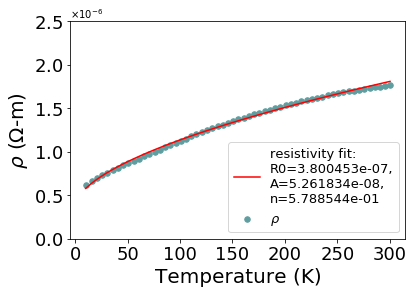

In [71]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label= '$\\rho$',color='cadetblue',s=30)
plt.plot(x, resistivity(x, *popt_res), 'r', label='resistivity fit:\nR0=%e,\nA=%e,\nn=%e' % tuple(popt_res), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=13)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.ylim(0, 0.0000025)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\\rho$ (\u03A9-m)' ,fontsize=20)
plt.show()

## conductivity_fitting   
### $\sigma$ (T) = $\sigma_{0}$ - A$\sigma_{0}^{2}$T$^{n}$
  
ref:Disordered electronic systems

In [80]:
x=np.array(df['Temperature'])
y=np.array(df['Conductivity (1/Ohm-m)'])
def conductivity(x,a,b,n):
    return a-b*a**2*x**n
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt_con, pcov_con = optimize.curve_fit(conductivity, x, y,p0=[0,0,1],bounds=((0,0,1),(101,1000,10)),maxfev=50000000000)
popt_con, pcov_con = optimize.curve_fit(conductivity, x, y,maxfev=10000000)
#calculate r_square
residuals = y- conductivity(x, *popt_con)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt_con)
print(r_squared)

[ 8.27551852e+05 -1.70955857e+02 -2.89181094e+01]
0.0


C:\Users\alial\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


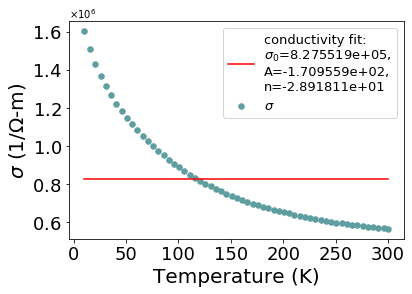

In [81]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label= '$\sigma$',color='cadetblue',s=30)
plt.plot(x, conductivity(x, *popt_con), 'r', label='conductivity fit:\n$\sigma$$_{0}$=%e,\nA=%e,\nn=%e' % tuple(popt_con), )
plt.legend(loc='best',fontsize=13)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
#plt.ylim(0, 0.000002)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\sigma$ (1/\u03A9-m)' ,fontsize=20)
plt.show()

## $\sigma$$^{qi}$ fitting  
### $\sigma$(T)=e$^{2}$/($\pi$$^{2}$h)*(1/l-1/l$_{\phi}$)  
### l$_{\phi}$ = CT$^{-p/2}$  
ref: PHYSICAL REVIEW B 92, 035203 (2015)


In [86]:

x=np.array(df['Temperature'])
y=np.array(df['Conductance(1/Ohm)']-df['Conductance(1/Ohm)'][0])

def sigma_qi(x,C,l,p):
    return r*(1/l-1/(C*x**(-p/2)))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt, pcov = optimize.curve_fit(sigma_qi, x, y,p0=[0,0,1],bounds=((0,0,1),(101,1000,10)),maxfev=50000000000)
popt, pcov = optimize.curve_fit(sigma_qi, x, y,maxfev=10000000)
#calculate r_square
#residuals = y- sigma_qi(x, *popt)
#ss_res = np.sum(residuals**2)
#ss_tot = np.sum((y-np.mean(y))**2)
#r_squared = 1 - (ss_res / ss_tot)
print(popt)
#print(r_squared)

[3.26463078e-07 3.25681582e-07 1.92936371e-03]


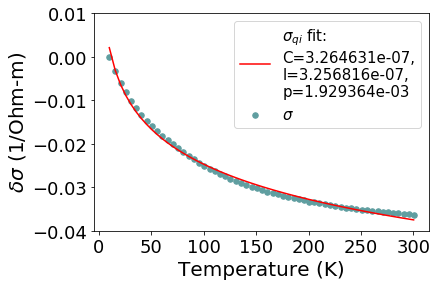

In [87]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label= '$\sigma$',color='cadetblue',s=30)
plt.plot(x, sigma_qi(x, *popt), 'r', label='$\sigma$$_{qi}$ fit:\nC=%e,\nl=%e,\np=%e' % tuple(popt), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=15)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.ylim(-0.04, 0.01)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\delta$$\sigma$ (1/Ohm-m)',fontsize=20)
plt.show()

## $\sigma_{ee}$ and $\sigma_{qi}$  
### $\delta\sigma$ (T) = C$_{ee}$T$^{1/2}$ - C$_{qi}$T$^{p/2}$  
ref: PHYSICAL REVIEW B 92, 035203 (2015)


In [107]:
x=np.array(df['Temperature'])
y=np.array(df['Conductivity (1/Ohm-m)']-df['Conductivity (1/Ohm-m)'][0])

def sigma_competing(x,cee,cqi,p):
    return cee*x**0.5-cqi*x**(p/2)
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)

popt1, pcov1 = optimize.curve_fit(sigma_competing, x, y,maxfev=10000000)
#popt1, pcov1 = optimize.curve_fit(sigma_competing, x, y,bounds=((0,0,-5),(100,100,5)),p0=[0.001,0.001,0.5],maxfev=10000000)
#calculate r_square
residuals = y- sigma_competing(x, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)
print(popt1)
print(r_squared)

[-6.85958095e+04 -7.41447532e-08  9.97960343e+00]
0.9638768214057504


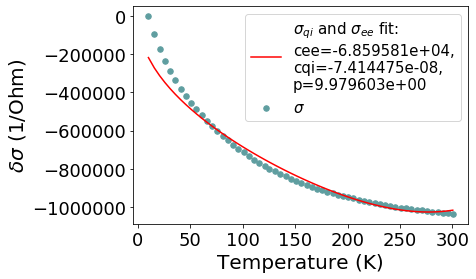

In [108]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label= '$\sigma$',color='cadetblue',s=30)
plt.plot(x, sigma_competing(x, *popt1), 'r', label='$\sigma$$_{qi}$ and $\sigma$$_{ee}$ fit:\ncee=%e,\ncqi=%e,\np=%e' % tuple(popt1), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=15)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
#plt.ylim(-0.04, 0.01)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\delta$$\sigma$ (1/Ohm)',fontsize=20)
plt.show()

## lnT fitting

In [13]:
x=np.array(df['Temperature'])
y=np.array(df['Conductance(1/Ohm)'])

def lnT(x,a):
    return a*np.log(x)
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt_lnT, pcov_lnT = optimize.curve_fit(lnT, x, y,maxfev=10000000)
#popt1, pcov1 = optimize.curve_fit(sigma_competing, x, y,bounds=((0,0,0),(100,100,100)),maxfev=10000000)
#calculate r_square
residuals = y- lnT(x, *popt_lnT)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)
print(popt_lnt)
print(r_squared)

NameError: name 'popt_lnt' is not defined

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label= '$\sigma$',color='cadetblue',s=30)
plt.plot(x, lnT(x, *popt_lnT), 'r', label='$\sigma$$_{qi}$ fit:\na=%f,' % tuple(popt_lnT), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best',fontsize=15)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.ylim(-0.04, 0.01)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('$\delta$$\sigma$',fontsize=20)
plt.show()